### Exploring Toy Dataset - IRIS
Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [79]:
# Importing the required libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [80]:
# Loading the Dataset
iris_dataset = load_iris()

In [81]:
iris_dataset.keys() # Priting the keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [82]:
# Uncomment to read the details related to IRIS datset
#print(iris_dataset.DESCR)

In [83]:
# Features
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
# Target Label
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
features = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
target = pd.DataFrame(iris_dataset.target, columns=['species'])
df = pd.concat([features, target], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Exploration and Data Cleaning

In [86]:
# Shape of Dataset
df.shape

(150, 5)

In [87]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [88]:
# Checking for NULL Values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [89]:
# Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [90]:
# Scaling the Data
from sklearn.preprocessing import scale
np_scaled = scale(df.drop('species', axis=1))
df_scaled_features = pd.DataFrame(np_scaled, columns=iris_dataset.feature_names)
df_scaled_full = pd.concat([df_scaled_features, df[['species']]], axis=1)
df_scaled_full.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [91]:
# Creating the correlation matrix
df_corr = df_scaled_full.corr()
df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


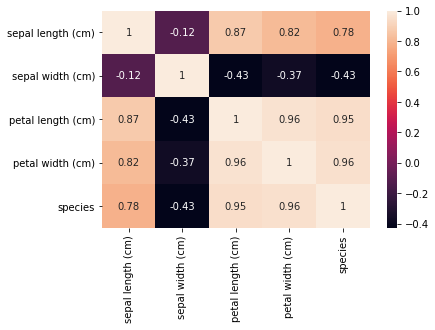

In [92]:
ax = sns.heatmap(df_corr, annot=True)

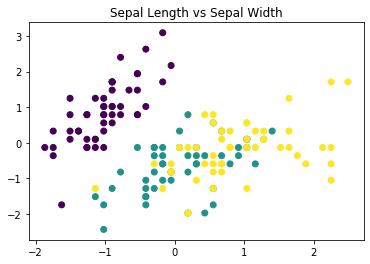

In [131]:
plt.scatter(x=df_scaled_full['sepal length (cm)'], y=df_scaled_full['sepal width (cm)'], c=df_scaled_full['species'])
plt.title('Sepal Length vs Sepal Width')
plt.show()

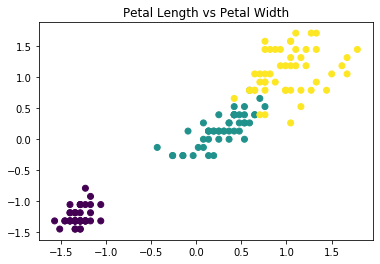

In [136]:
plt.scatter(x=df_scaled_full['petal length (cm)'], y=df_scaled_full['petal width (cm)'], c=df_scaled_full['species'])
plt.title('Petal Length vs Petal Width')
plt.show()